In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from OneLoopLFVHD.LFVHDFeynG_mpmath2 import C0,C1,C2,B12_0,B1_1,B2_1,B1_0,B2_0,x0,x1,x2,x3,R0,y11np,y12np,f1

In [3]:
from OneLoopLFVHD.data import ml

In [4]:
from mpmath import *

In [5]:
mp.dps = 100; mp.pretty = True

In [6]:
from OneLoopLFVHD.data import ml

In [7]:
n = 500
mn = np.linspace(150,2000,n)
mW = mpf('80.379')
mh = mpf('125.1')
FactorRDC = 1.0/(1j*pi**2)
FactorRD = 1j/(16*pi**2)

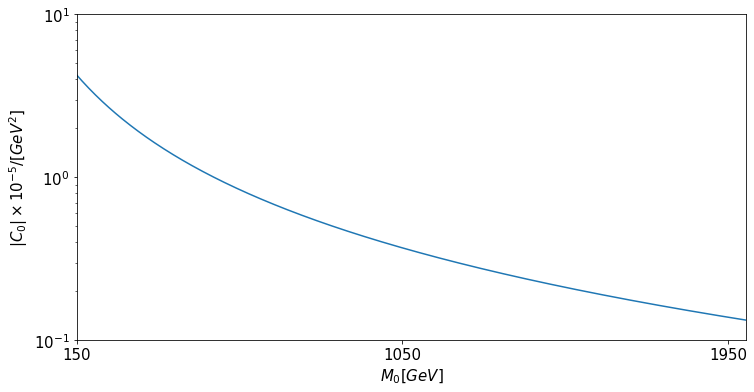

In [8]:
Y = np.array([abs(C0(mh,m,100,100))*1e5 for m in mn])
plt.figure(figsize=(12,6))
plt.semilogy(mn,Y)
plt.yticks([0.1,1,10],fontsize=15)
plt.xticks([150,1050,1950],fontsize=15);
plt.ylabel(r'$|C_0|\times 10^{-5}/[GeV^2]$',fontsize=15)
plt.xlabel(r'$M_0[GeV]$',fontsize=15);
plt.xlim(left=150,right=2000);

In [9]:
#Y = np.array([abs(C0(mh,m,100,100))*1e5 for m in mn])
mn = np.logspace(-1,15,n)
Y = np.array([(abs(C0(mh,mW,mpf('1e-12'),mpf(m)))) for m in mn])
Y1 = np.array([(abs(C1(mh,ml[1],mW,mpf('1e-12'),mpf(m)))) for m in mn])
Y2 = np.array([(abs(C2(mh,ml[3],mW,mpf('1e-12'),mpf(m)))) for m in mn])
Ylog = np.array([abs(log(m**2)/m**2) for m in mn])

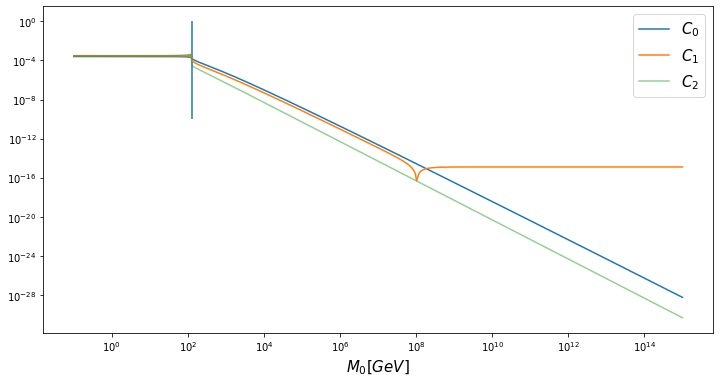

In [10]:
plt.figure(figsize=(12,6))
plt.loglog(mn,Y,label='$C_0$')
plt.loglog(mn,Y1,label='$C_1$')
plt.loglog(mn,Y2,label='$C_2$',alpha=0.5)
#plt.loglog(mn,abs(Y1 - Y2),label='$C_1 - C_2$',alpha=0.5)
#plt.loglog(mn,Ylog)
plt.xlabel(r'$M_0[GeV]$',fontsize=15);
plt.vlines(125.1,1e-10,1)
plt.legend(fontsize=15)

In [11]:
mn = np.logspace(8,15,n)
YB20 = np.array([B2_0(ml[3],mW,m)/mh**2 for m in mn])
YB12 = np.array([B12_0(mh,mpf('1e-12'),m)/mh**2 for m in mn])
YC0 = np.array([(mpf('1e-12')**2 - mW**2)*C0(mh,mW,mpf('1e-12'),mpf(m))/mh**2 for m in mn])

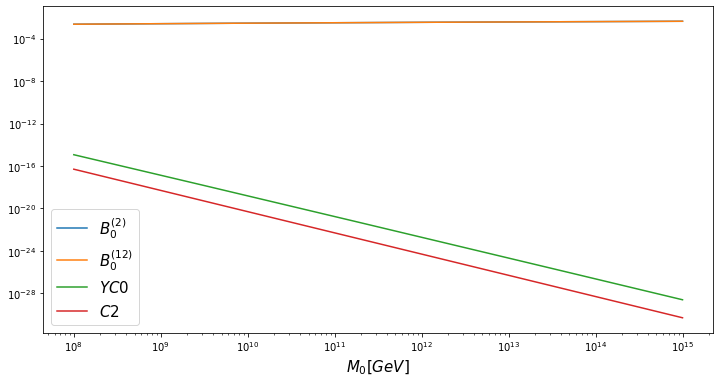

In [12]:
plt.figure(figsize=(12,6))
plt.loglog(mn,abs(YB20),label='$B_0^{(2)}$')
plt.loglog(mn,abs(YB12),label='$B^{(12)}_0$')

plt.loglog(mn,abs(YC0),label='$YC0$')
plt.loglog(mn,abs((YB20 - YB12 + YC0)),label='$C2$')
#plt.loglog(mn,Y,label='$C0$')

#plt.loglog(mn,Ylog)
plt.xlabel(r'$M_0[GeV]$',fontsize=15);
plt.legend(fontsize=15)

In [13]:
YY = np.array([abs(fadd(YB20[k],-YB12[k],  exact=True)) for k in range(len(mn))])

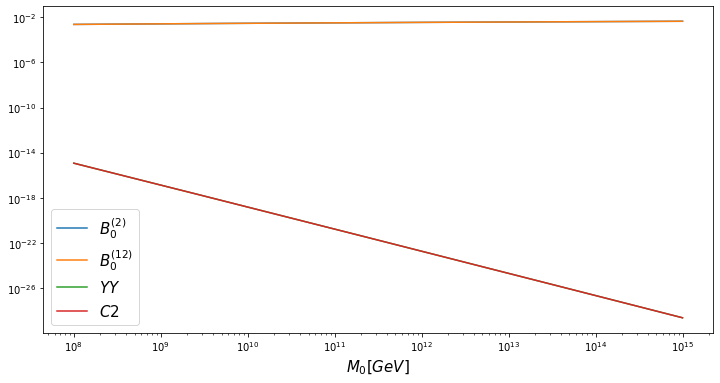

In [14]:
plt.figure(figsize=(12,6))
plt.loglog(mn,abs(YB20),label='$B_0^{(2)}$')
plt.loglog(mn,abs(YB12),label='$B^{(12)}_0$')

plt.loglog(mn,YY,label='$YY$')
plt.loglog(mn,abs((YB20 - YB12)),label='$C2$')
plt.xlabel(r'$M_0[GeV]$',fontsize=15);
plt.legend(fontsize=15)


In [20]:
M0 = mW; M1=mpf(1e-12); M2=mpf(1e15)
y0 = np.array([x0(mh,M0,m) for m in mn])
y3 = np.array([x3(M0,m) for m in mn])
y1 = np.array([x1(mh,M1,m) for m in mn])
y2 = np.array([x2(mh,M1,m) for m in mn])

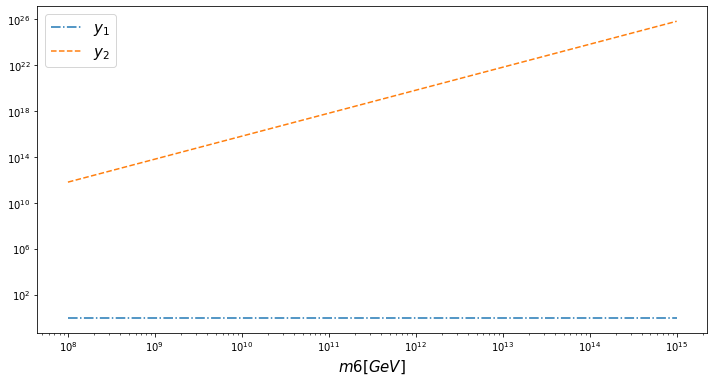

In [21]:
plt.figure(figsize=(12,6))
#plt.loglog(mn,y0,'--',label='$y_0$')
plt.loglog(mn,y1,'-.',label='$y_1$')
plt.loglog(mn,y2,'--',label='$y_2$')
#plt.loglog(mn,y3,'-.',label='$y_3$')
plt.xlabel(r'$m6[GeV]$',fontsize=15);
plt.legend(fontsize=15)

In [22]:
from OneLoopLFVHD.LFVHDFeynG_mpmath2 import y11np,y12np,y21np, y22np, f0np

In [23]:
mn = np.logspace(-1,15,n)
y11 = np.array([y11np(ml[1],M0,mpf('1e-12')) for m in mn])
y12 = np.array([y12np(ml[1],M0,mpf('1e-12')) for m in mn])
y21 = np.array([y21np(ml[3],M0,m) for m in mn])
y22 = np.array([y22np(ml[3],M0,m) for m in mn])

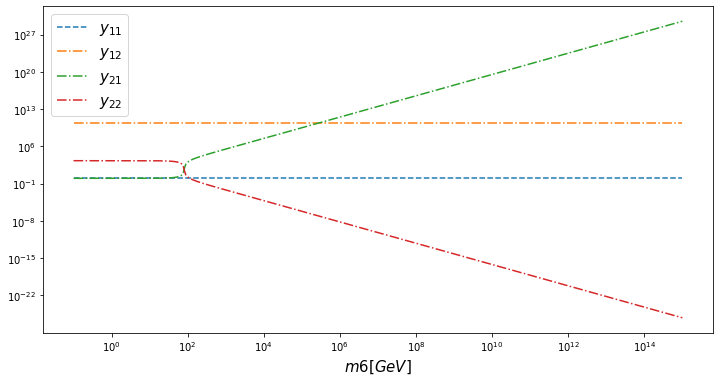

In [24]:
plt.figure(figsize=(12,6))
plt.loglog(mn,abs(y11),'--',label='$y_{11}$')
plt.loglog(mn,abs(y12),'-.',label='$y_{12}$')
plt.loglog(mn,abs(y21),'-.',label='$y_{21}$')
plt.loglog(mn,abs(y22),'-.',label='$y_{22}$')
plt.xlabel(r'$m6[GeV]$',fontsize=15);
plt.legend(fontsize=15)

In [25]:
f0npy11 = np.array([f0np(y) for y in y11])
f0npy12 = np.array([f0np(y) for y in y12])
f0npy21 = np.array([f0np(y) for y in y21])
f0npy22 = np.array([f0np(y) for y in y22])
#logm12 = np.array([log(m**2)for m in mn])

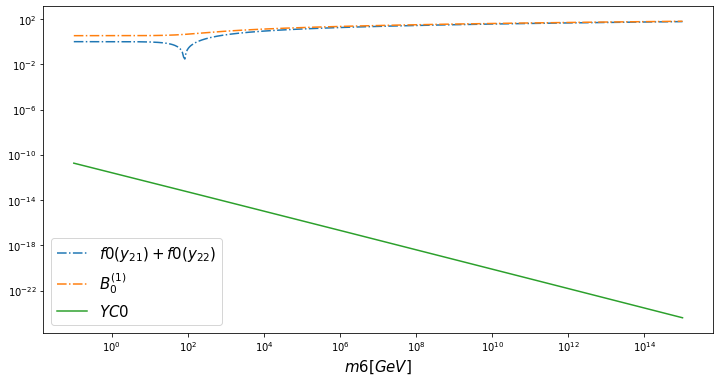

In [26]:
plt.figure(figsize=(12,6))
#plt.loglog(mn,abs(f0npy11),'--',label='$f0(y_{11})$')
#plt.loglog(mn,abs(f0npy12),'-.',label='$f0(y_{12})$')
#plt.loglog(mn,abs(logm12),'-.',label='$log(m^2)$')
#plt.loglog(mn,abs(f0npy11 + f0npy12),'-.',label='$f0(y_{11}) + f0(y_{12})$')
#plt.loglog(mn,abs(-log(mW) -f0npy11 - f0npy12),'-.',label='$B_0^{(1)}$')

plt.loglog(mn,abs(f0npy21 + f0npy22),'-.',label='$f0(y_{21}) + f0(y_{22})$')
plt.loglog(mn,abs(-log(mW) -f0npy21 - f0npy22),'-.',label='$B_0^{(1)}$')

plt.loglog(mn,abs(YC0),label='$YC0$')


plt.xlabel(r'$m6[GeV]$',fontsize=15);
plt.legend(fontsize=15)

In [27]:
A21 = np.array([y*log(-y) for y in y21])
A22 = np.array([y*log(-y) for y in y22])

B21 = np.array([y*log(1-y) for y in y21])
B22 = np.array([y*log(1-y) for y in y22])

C21 = np.array([log(1-1/y) for y in y21])
C22 = np.array([log(1-1/y) for y in y22])

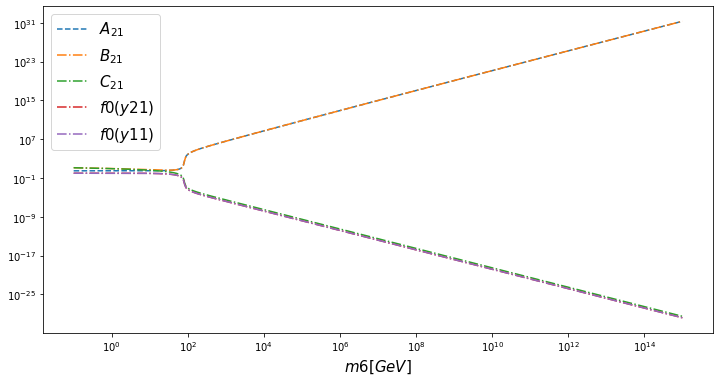

In [28]:
plt.figure(figsize=(12,6))
plt.loglog(mn,abs(A21),'--',label='$A_{21}$')
plt.loglog(mn,abs(B21),'-.',label='$B_{21}$')
plt.loglog(mn,abs(C21),'-.',label='$C_{21}$')
plt.loglog(mn,abs(f0npy21),'-.',label='$f0(y21)$')
plt.loglog(mn,abs(A21 -B21 + C21 - 1.0),'-.',label='$f0(y11)$')

plt.xlabel(r'$m6[GeV]$',fontsize=15);
plt.legend(fontsize=15)

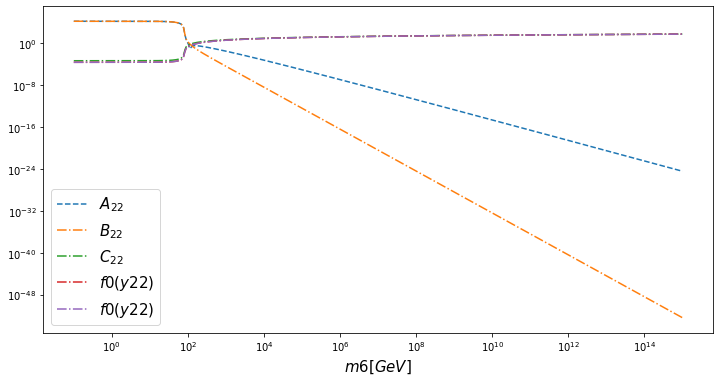

In [29]:
plt.figure(figsize=(12,6))
plt.loglog(mn,abs(A22),'--',label='$A_{22}$')
plt.loglog(mn,abs(B22),'-.',label='$B_{22}$')
plt.loglog(mn,abs(C22),'-.',label='$C_{22}$')
plt.loglog(mn,abs(f0npy22),'-.',label='$f0(y22)$')
plt.loglog(mn,abs(A22 -B22 + C22 - 1.0),'-.',label='$f0(y22)$')

plt.xlabel(r'$m6[GeV]$',fontsize=15);
plt.legend(fontsize=15)

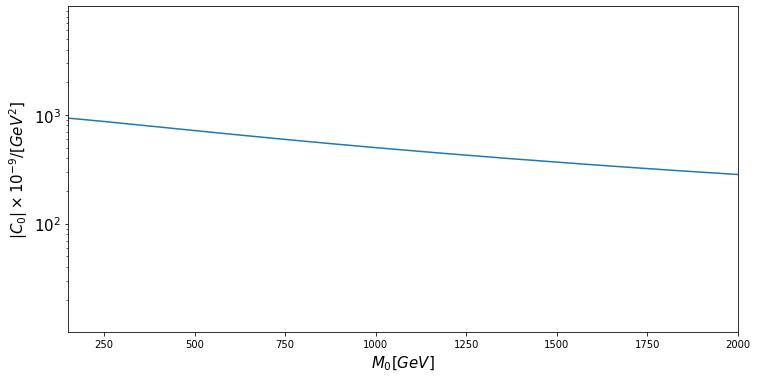

In [30]:
Y = np.array([np.abs(C0(mh,m,1000,1000)*1e9) for m in mn])
plt.figure(figsize=(12,6))
plt.semilogy(mn,Y)
plt.yticks([100,1000],fontsize=15);
plt.ylabel(r'$|C_0|\times 10^{-9}/[GeV^2]$',fontsize=15);
plt.xlabel(r'$M_0[GeV]$',fontsize=15);
plt.xlim(left=150,right=2000);
plt.ylim(10,10000);

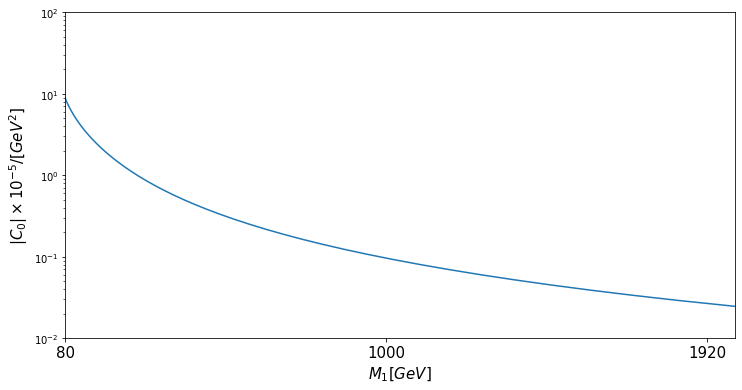

In [31]:
Y = np.array([np.abs(C0(mh,100,m,m))*1e5 for m in mn])
plt.figure(figsize=(12,6))
plt.semilogy(mn,Y)
#plt.yticks([0.1,1,10],fontsize=15)
plt.xticks([80,1000,1920],fontsize=15);
plt.ylabel(r'$|C_0|\times 10^{-5}/[GeV^2]$',fontsize=15)
plt.xlabel(r'$M_1[GeV]$',fontsize=15)
plt.xlim(left=80,right=2000);
plt.ylim(1e-2,100);

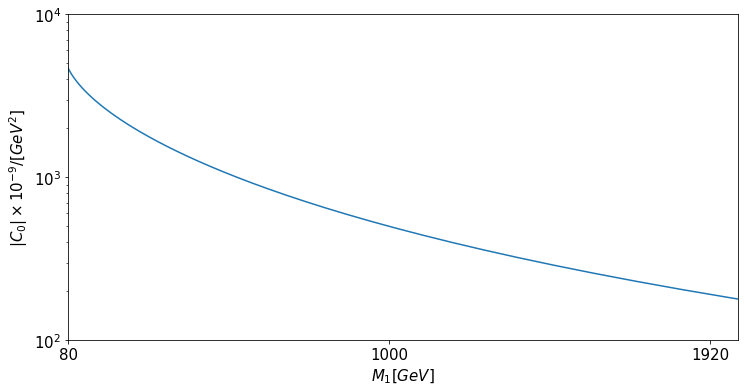

In [32]:
Y = np.array([np.abs(C0(mh,1000,m,m))*1e9for m in mn])
plt.figure(figsize=(12,6))
plt.semilogy(mn,Y)
plt.yticks([100,1000,10000],fontsize=15)
plt.xticks([80,1000,1920],fontsize=15);
plt.ylabel(r'$|C_0|\times 10^{-9}/[GeV^2]$',fontsize=15)
plt.xlabel(r'$M_1[GeV]$',fontsize=15)
plt.xlim(left=80,right=2000);
plt.ylim(100,10000);

In [33]:
mn = np.linspace(1,2000,n)
Y = np.array([np.abs(C0(mh,1e-10,mpf(m),mpf(m)))*1e9 for m in mn])
#Ydiff = np.array([diff(lambda x: C0(mh,1e-10,x,x),m)*1e9 for m in mn])

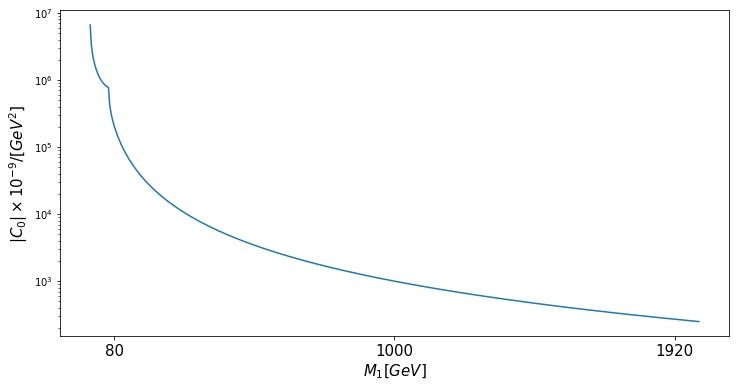

In [34]:
plt.figure(figsize=(12,6))
plt.semilogy(mn,Y)
#plt.semilogy(mn,abs(Ydiff))
plt.xticks([80,1000,1920],fontsize=15);
plt.ylabel(r'$|C_0|\times 10^{-9}/[GeV^2]$',fontsize=15);
plt.xlabel(r'$M_1[GeV]$',fontsize=15);
#plt.vlines(80.379,1,1e7,linestyles='--')
#plt.ylim(1e-4,1e7);

In [35]:
m = 80
abs(C0(mh,1e-10,mpf(m),mpf(m)))

0.0002059570060410428228010672528762060994241339272552351197103749008614002536268532783474311000706615086

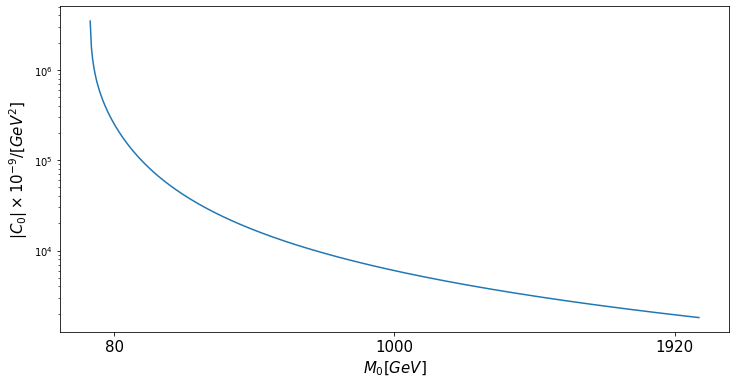

In [36]:
plt.figure(figsize=(12,6))
Y = np.array([np.abs(C0(mh,m,1e-10,1e-10))*1e9 for m in mn])
plt.semilogy(mn,Y)
plt.xticks([80,1000,1920],fontsize=15);
plt.ylabel(r'$|C_0|\times 10^{-9}/[GeV^2]$',fontsize=15);
plt.xlabel(r'$M_0[GeV]$',fontsize=15);
#plt.xlim(left=80,right=2000);